# Práctica 2: Aprendizaje automático no supervisado

El objetivo de esta práctica es aplicar algunos algoritmos de aprendizaje automático no supervisado disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjunto de datos e interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 11__

__Nombres de los estudiantes: Alejandro Barrachina Argudo y Jaime Benedí Galdeano__

In [160]:
# acceso a google drive

# from google.colab import drive
# drive.mount('/content/drive')

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `housing.csv` que se proporciona junto con la práctica.
Antes de nada, elimina las filas con valores nulos.



In [161]:
import pandas as pd
import numpy as np

df = pd.read_csv('./housing.csv')
df = df.dropna()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [162]:
desc= df.describe()
desc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [163]:
df_num = df.loc[:, df.dtypes != object] # dejamos solo los valores numéricos
df_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [164]:
corr = df_num.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [165]:
aux = []
for i in corr.index:
    for j in corr.columns:
        if i != j and (corr[i][j] < -0.6 or corr[i][j] > 0.6):
                if((i,j,corr[i][j]) not in aux and (j,i,corr[i][j]) not in aux): # eliminamos duplicados
                    aux.append((i, j, corr[i][j]))

print("Variables con fuerte ( > 0.6 o < -0.6 ) relación:")

aux


Variables con fuerte ( > 0.6 o < -0.6 ) relación:


[('longitude', 'latitude', -0.9246161131160101),
 ('total_rooms', 'total_bedrooms', 0.9303795046865031),
 ('total_rooms', 'population', 0.8572812510982867),
 ('total_rooms', 'households', 0.9189915343453182),
 ('total_bedrooms', 'population', 0.8777467431529311),
 ('total_bedrooms', 'households', 0.9797282708045709),
 ('population', 'households', 0.9071859001744995),
 ('median_income', 'median_house_value', 0.6883554753161126)]

In [166]:
aux_inv = []
for i in corr.index:
    for j in corr.columns:
        if i != j and (corr[i][j] < 0.6 or corr[i][j] > -0.6):
                if((i,j,corr[i][j]) not in aux_inv and (j,i,corr[i][j]) not in aux_inv): # eliminamos duplicados
                    aux_inv.append((i, j, corr[i][j]))

print("Variables con baja ( < 0.6 o > -0.6 ) relación:")

aux_inv

Variables con baja ( < 0.6 o > -0.6 ) relación:


[('longitude', 'latitude', -0.9246161131160101),
 ('longitude', 'housing_median_age', -0.10935654863027307),
 ('longitude', 'total_rooms', 0.0454801674218395),
 ('longitude', 'total_bedrooms', 0.06960802175408133),
 ('longitude', 'population', 0.10027030094083503),
 ('longitude', 'households', 0.056512772430637834),
 ('longitude', 'median_income', -0.015550150379729375),
 ('longitude', 'median_house_value', -0.04539821933443104),
 ('latitude', 'housing_median_age', 0.011899066824480742),
 ('latitude', 'total_rooms', -0.036666805610771125),
 ('latitude', 'total_bedrooms', -0.06698283471949555),
 ('latitude', 'population', -0.10899734357206249),
 ('latitude', 'households', -0.07177418526952299),
 ('latitude', 'median_income', -0.07962631913885085),
 ('latitude', 'median_house_value', -0.1446382115762039),
 ('housing_median_age', 'total_rooms', -0.36062829984244227),
 ('housing_median_age', 'total_bedrooms', -0.32045104175060396),
 ('housing_median_age', 'population', -0.2957872971044803)

In [167]:
important_columns= []
for (i,j,corr) in aux:
    important_columns.append(i) if i not in important_columns else None
    important_columns.append(j) if j not in important_columns else None

important_columns

['longitude',
 'latitude',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
    

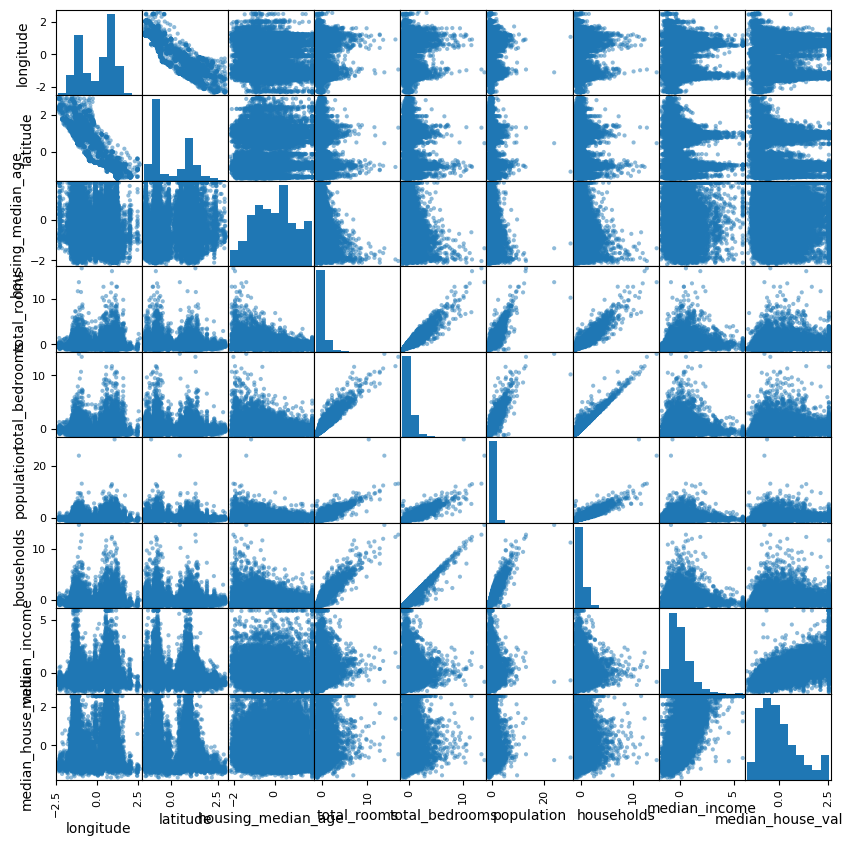

In [168]:
import pandas.plotting as pd_plot
import matplotlib
%matplotlib inline

# version casera del pairplot
normalized_df=(df_num-df_num.mean())/df_num.std()
# usamos la normalizada porque nos interesa la distribución de los datos pero los números grandes hacen que las tags sean poco legibles
pd_plot.scatter_matrix(normalized_df, figsize=(10,10))


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [169]:
df_cat = df.loc[:, df.dtypes == object] # dejamos solo los valores categóricos
df_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


<Axes: >

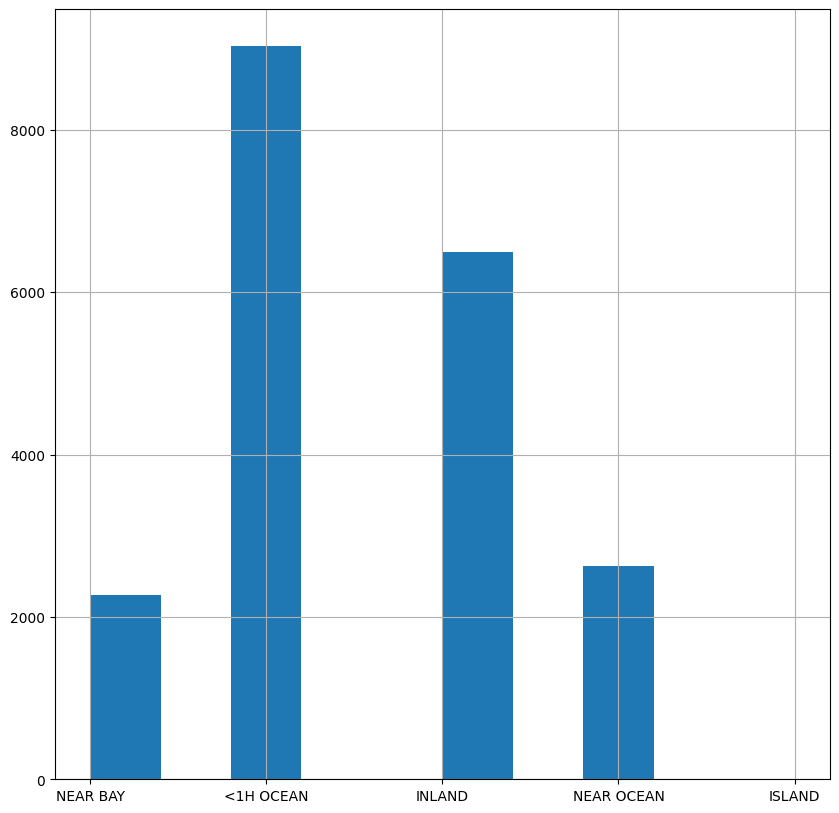

In [170]:
df_cat['ocean_proximity'].hist(figsize=(10,10))

In [171]:
island_count = df_cat['ocean_proximity'].value_counts()
island_count

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [172]:
df_simplificado = df.drop(['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'], axis=1)
df_simplificado

,median_house_value,ocean_proximity
0,452600.0,NEAR BAY
1,358500.0,NEAR BAY
2,352100.0,NEAR BAY
3,341300.0,NEAR BAY
4,342200.0,NEAR BAY
...,...,...
20635,78100.0,INLAND
20636,77100.0,INLAND
20637,92300.0,INLAND
20638,84700.0,INLAND


In [174]:
dict_transform = {'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}
df_simplificado['ocean_proximity'] = df_simplificado['ocean_proximity'].transform(lambda x: dict_transform[x])
df_simplificado

0        0
1        0
2        0
3        0
4        0
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: ocean_proximity, Length: 20433, dtype: int64

In [175]:
corr_simp = df_simplificado.corr()
corr_simp

TypeError: Series.corr() missing 1 required positional argument: 'other'

## 3) Preprocesar los datos

Para realizar el clustering puedes decidir quedarte con un subconjunto de las variables. Justifica la respuesta de tu decisión.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [ ]:
columnas_no_importantes = list(set(df_num.columns) - set(important_columns))


columnas_no_importantes

['housing_median_age']

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula el índice davies_boulding en función del número de clusters.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.

